In [ ]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sys import exit
import plotnine as p9
from sklearn.model_selection import train_test_split
!pip install palmerpenguins

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
from palmerpenguins import load_penguins

penguins = load_penguins().dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
# Dummify categorical variables
dummies = pd.get_dummies(penguins, columns=["species", "island", "sex"], drop_first=True)

X = penguins[["bill_length_mm"]]
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

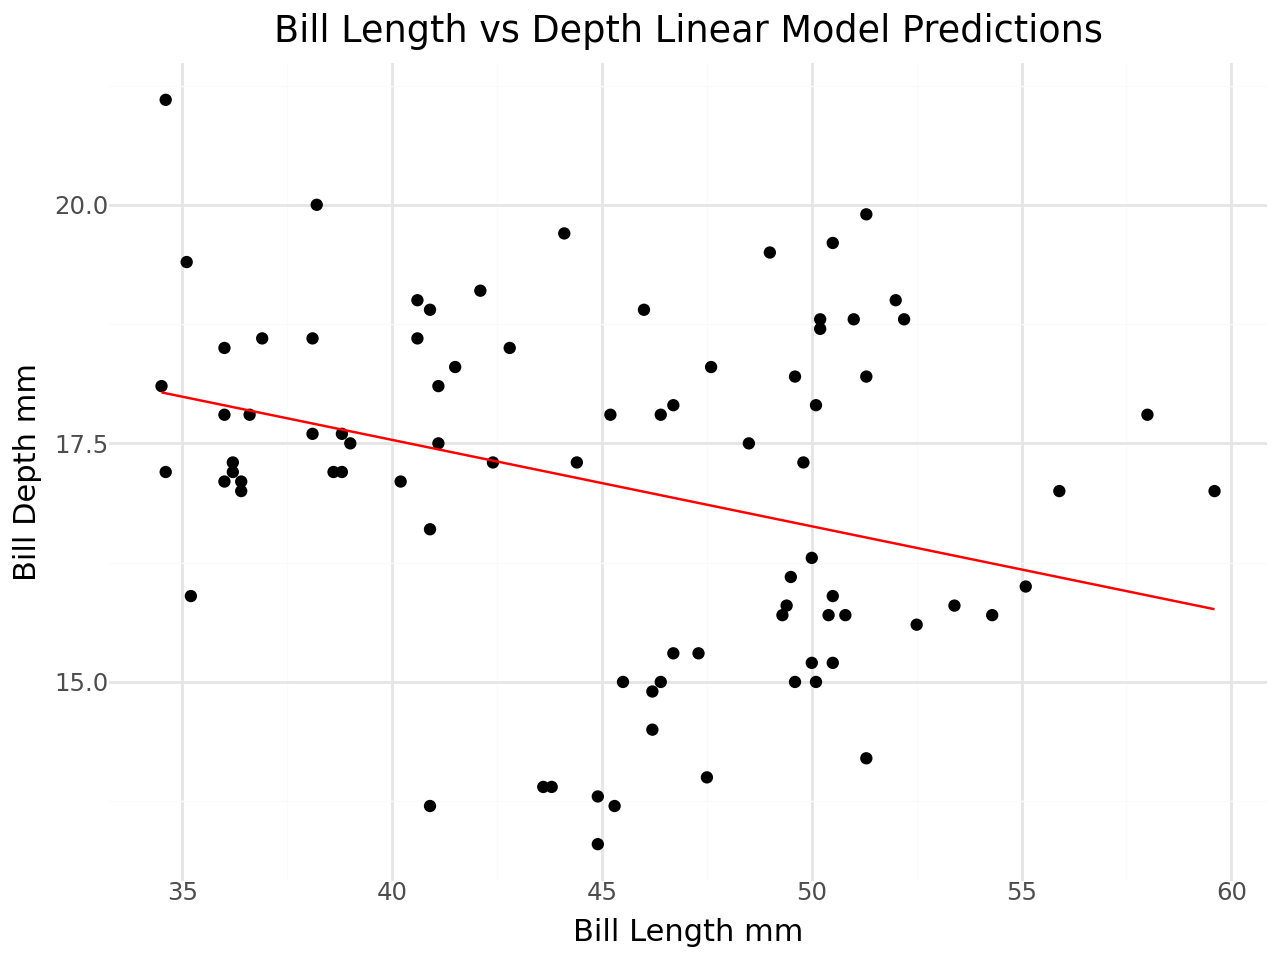

In [ ]:
# Specifying Model and Fits
lr = LinearRegression()
lr.fit(X=X_train[['bill_length_mm']], y=y_train)
lr_pred = lr.predict(X_test[['bill_length_mm']])

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'lr_pred': lr_pred})

(p9.ggplot(test_data, p9.aes(x="X_test"))
        + p9.geom_point(p9.aes(y='y_test'), color="black")
        + p9.geom_line(p9.aes(y='lr_pred'), color="red")
        + p9.theme_minimal()
        + p9.labs(x='Bill Length mm', y='Bill Depth mm', title='Bill Length vs Depth Linear Model Predictions')
)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

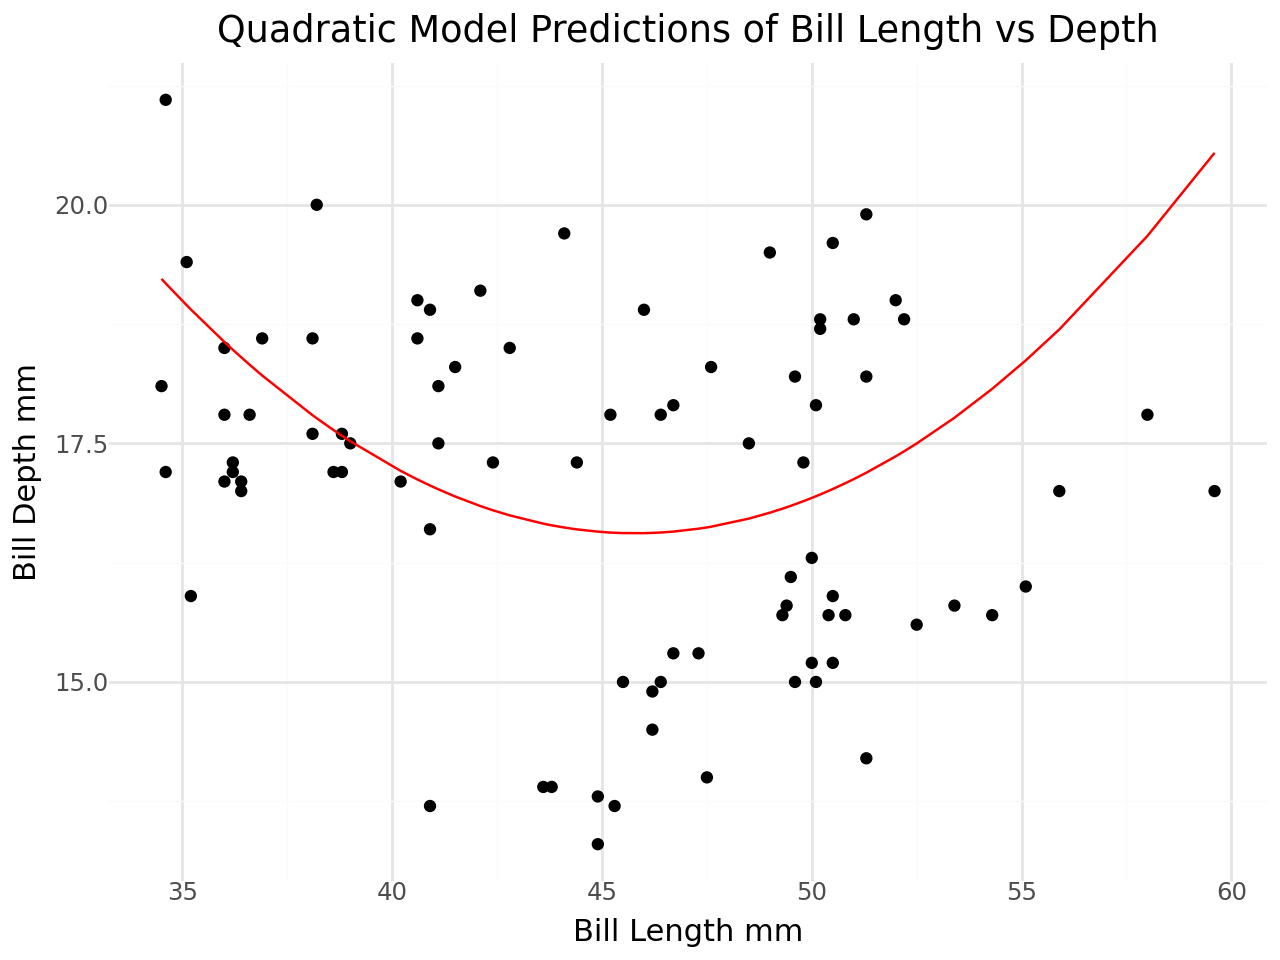

In [ ]:
quadratic = PolynomialFeatures(degree=(1,2))
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
pipeline = Pipeline([
    ('polynomial_features', quadratic),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
pipeline.fit(X_train, y_train)

# Predicting with model
quadratic_pred = pipeline.predict(X_test)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'quad_pred': quad_pred})

(p9.ggplot(test_data, p9.aes(x="X_test"))
+ p9.geom_point(p9.aes(y='y_test'), color="black")
+ p9.geom_line(p9.aes(y='quad_pred'), color="red")
+ p9.theme_minimal()
+ p9.labs(x='Bill Length mm', y='Bill Depth mm', title='Quadratic Model Predictions of Bill Length vs Depth')
)

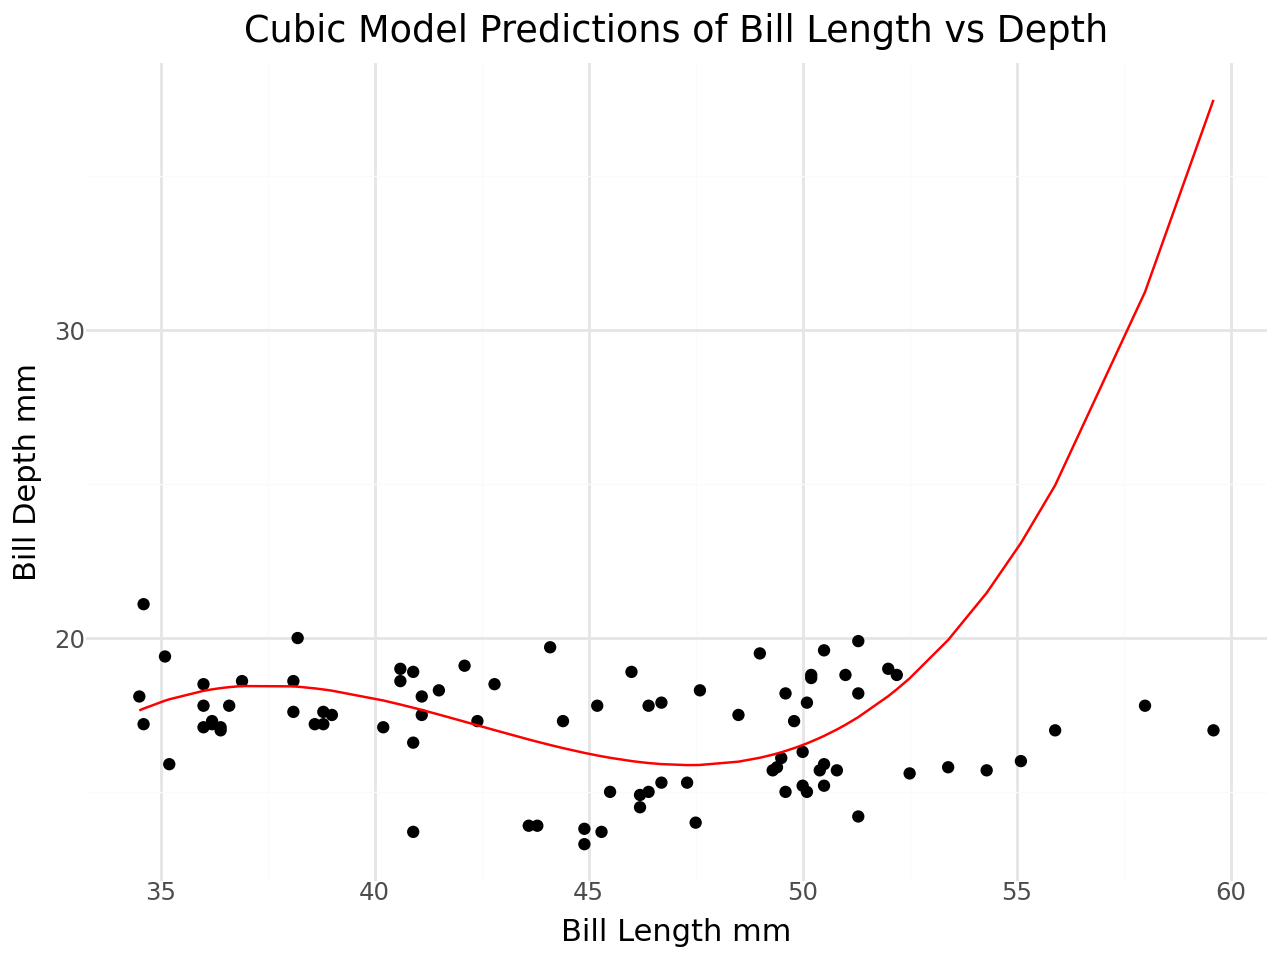

In [ ]:
cubic = PolynomialFeatures(degree=(1,3))
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
pipeline = Pipeline([
    ('polynomial_features', cubic),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
pipeline.fit(X_train, y_train)

# Predicting with model
cubic_pred = pipeline.predict(X_test)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'quad_pred': cub_pred})

(p9.ggplot(test_data, p9.aes(x="X_test"))
 + p9.geom_point(p9.aes(y='y_test'), color="black")
 + p9.geom_line(p9.aes(y='quad_pred'), color="red")
 + p9.theme_minimal()
 + p9.labs(x='Bill Length mm', y='Bill Depth mm', title='Cubic Model Predictions of Bill Length vs Depth')
)

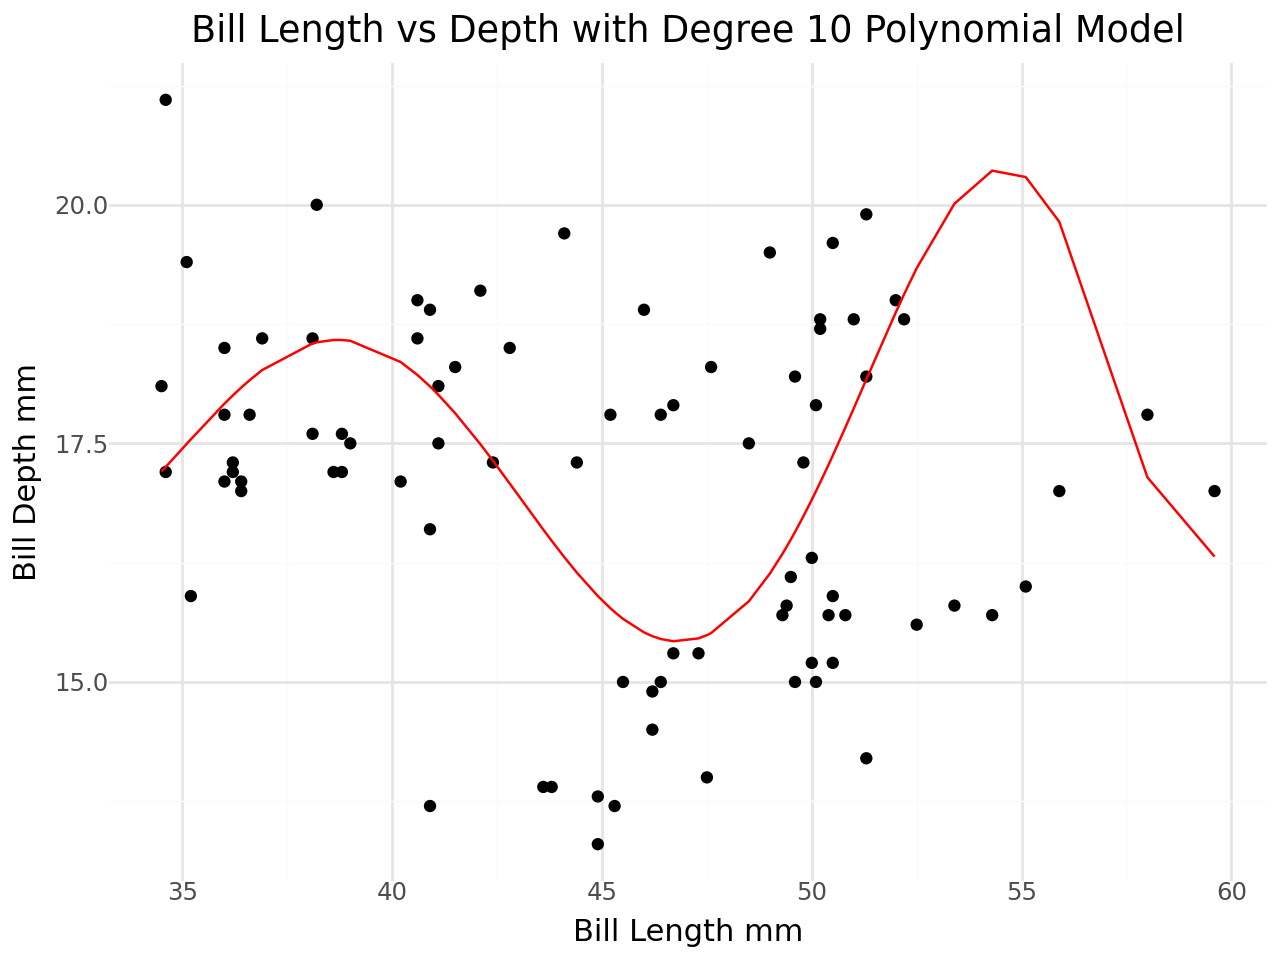

In [ ]:
degree_10 = PolynomialFeatures(degree=10)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
pipeline = Pipeline([
    ('polynomial_features', degree_10),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
pipeline.fit(X_train[['bill_length_mm']], y_train)  # Selecting only 'bill_length_mm' column

# Predicting with the degree-10 polynomial model
deg_pred = pipeline.predict(X_test[['bill_length_mm']])

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'deg_pred': deg_pred})

(p9.ggplot(test_data, p9.aes(x="X_test"))
 + p9.geom_point(p9.aes(y='y_test'), color="black")
 + p9.geom_line(p9.aes(y='deg_pred'), color="red")
 + p9.theme_minimal()
 + p9.labs(x='Bill Length mm', y='Bill Depth mm', title='Bill Length vs Depth with Degree 10 Polynomial Model')
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?